## 0. Introduction

The aim of this lab is to get familiar with **Neural Networks**. We will be using some code extracts that were implemented on the week 4 Classification I lab and build a Neural Network.

1.   This lab is part of Assignment 1 part 2.
2.   A report answering the <font color = 'red'>**questions in</font><font color = "maroon"> red**</font> should be submitted on QMplus along with the completed Notebooks.
3. A single pdf report should be submitted on QMplus along with the completed Notebooks **for both** this and the Classification I notebook (lab 4).
4. The deadline for **both** is **Friday, 17 November 11:59pm**
5. The report should be a separate file in **pdf format** (so **NOT** *doc, docx, notebook* etc.), well identified with your name, student number, assignment number (for instance, Assignment 1), module code.
6. Make sure that **any figures or code** you comment on, are **included in the report**.
7. No other means of submission other than the appropriate QM+ link is acceptable at any time (so NO email attachments, etc.)
8. **PLAGIARISM** <ins>is an irreversible non-negotiable failure in the course</ins> (if in doubt of what constitutes plagiarism, ask!).


For this lab, we will be using the [iris dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset).

## 0.1 Intro to Neural Networks

As covered in the lecture notes, Neural Networks (NN) are inspired by biological brains. Each "neuron" does a very simple calculation, however collectively they can do powerful computations.

A simple model neuron is called a Perceptron and is comprised of three components:
1. The weights
2. The input function
3. The activation function

perceptron.png

We can re-imagine the logistic regression unit as a neuron (function) that multiplies the input by the parameters (weights) and squashes the resulting sum through the sigmoid.

A Feed Forward NN will be a connected set of logistic regression units, arranged in layers. Each unit’s output is a non-linear function (e.g., sigmoid, step function) of a linear combination of its inputs.
nn.svg

We will use the sigmoid as an activation function. Add the sigmoid function and `LogisticRegression` class from week 4 lab below.
Change the parameter initialization in `LogisticRegression`, so that a random set of initial weights is used.



<u><font color="maroon">**Q1.** Why is it important to use a random set of initial weights rather than initializing all weights as zero in a Neural Network? [2 marks] </font></u>

The initial value of weights is really important and usually dictates how the training will go, if we set all wieghts to 0, the overall result will be 0 and the partial derivative of loss with respect to the weights will be be the same as with every other weight. Using a random set of initial weights in a neural network is crucial because it prevents the network from getting stuck in symmetrical configurations. When all weights are initialized to zero, all neurons in a layer will have the same gradients during backpropagation, resulting in the same updates during training. 

In [1]:
pip install torch

  Using cached torch-2.1.0-cp310-cp310-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.18.1-py3-none-manylinux1_x86_64.

In [4]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from sklearn import model_selection
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from IPython import display
import typing
%matplotlib inline

torch.manual_seed(0)

In [5]:
## sigmoid
def sigmoid(z: torch.Tensor) -> torch.Tensor:
    ### your code here
    # z will be the input to the sigmoid function.
    return 1/ (1+torch.exp(-z))

In [6]:
## logistic regression class
class LogisticRegression(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.nf = num_features
    self.inputs = None
    self.output = None
    self.y = None
    self.weight = nn.Parameter(torch.randn(1, num_features), requires_grad=False)

  def forward(self, x):
    y = 0
    self.inputs = x
    self.output = torch.matmul(x, self.weight.T)
    self.y = sigmoid(self.output)
    return self.y

  def __str__(self):
    return f"LR({self.nf} inputs)"

# 1. The XOR problem

Let's revisit the XOR problem.

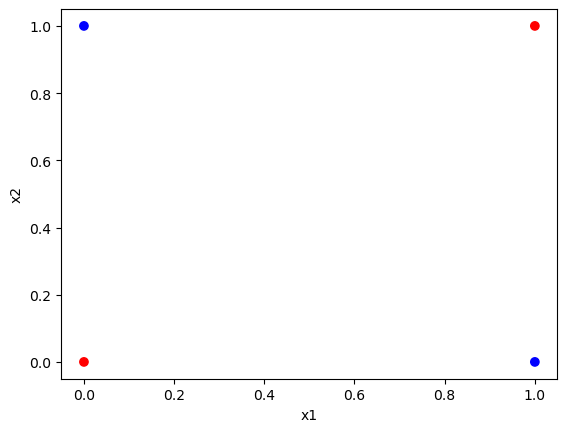

In [5]:
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
y = [0, 1, 1, 0]

c_map = ['r', 'b', 'b', 'r']
plt.scatter(x1, x2, c=c_map)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<u><font color="maroon"> **Q2.** How does a NN solve the XOR problem? [1 marks]</font></u>


We will implement back-propagation on a Feed Forward network to solve the XOR problem. The nework will have 2 inputs, 2 hidden neurons and one output neuron. The architecture is visualised as follows:

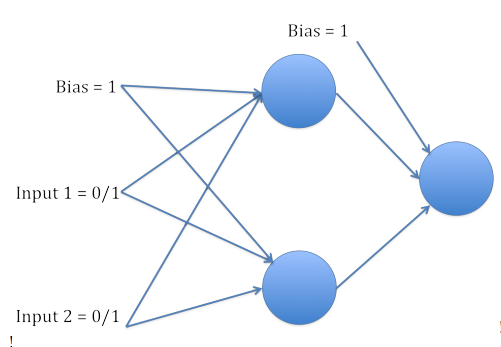

Using `LogisticRegression` and `sigmoid` from week 4 lab, implement the forward pass in the class below. Assume a single sample at a time (i.e. the shape of `x` is `(1, num_features`)). [2 marks]

Hint: Check `ModuleList` [documentation](https://pytorch.org/docs/stable/generated/torch.nn.ModuleList.html).

In [26]:
torch.sum(torch.tensor([[1,2,3], [4,5,6]] ), dim=1)

tensor([ 6, 15])

In the `NeuralNetwork` class above, fill in the `backward_pass()` method.

The implementation should support outputs of any size. To implement the backward pass, follow the steps below:



*   **Step 1:** For each output, $k$, calculate the partial derivative: $\delta_{k} = (y_{k}-t_{k}) \times g'(x_{k})$ \\
where $y_{k}$ is the response of the output neuron and $t_{k}$ is the desired output (target). The derivative of the sigmoid function $g'(x_{k})$ is defined as $g'(x_{k}) = g(x_{k}) × (1 - g(x_{k}))$ [1 marks]
*  **Step 2:** We now need to probagate this error to the hidden neurons. To accomplish this remember that: $$
 \delta_{j} = g^\prime(x_{j}) \sum_{k} w_{jk} \delta_{k}
$$  where $\delta_{j}$ is the error on the j-th hidden neuron,$x_{j}$ is the value of the hidden neuron (before it has been passed through the sigmoid function), $g^\prime$ is the derivative of the sigmoid function, $\delta_{k}$ is the error from the output neuron calculated in step 1, and $w_{jk}$ is the weight from the hidden neuron $j$ to the output neuron $k$. [1 marks]

* **Step 3:** We now need to update the output weights, i.e. the connections from the hidden neurons to the output neurons. This is accomplished using the formula: $$
 w_{jk} = w_{jk} - \eta \delta_{k} \alpha_{j}
$$ where $w_{jk}$ is the weight connecting the j-th hidden neuron to the k-th output neuron. $\alpha_{j}$ is the activity of the j-th hidden neuron (after it has been transformed by the sigmoid function), $\delta_{k}$ is the error from the output neuron stored in output\_deltas and $\eta$ is the learning rate [1 mark]

* **Step 4:**  Finally we need to update the hidden weights, i.e. the connections from the hidden neurons to the inputs. Here, again we use this equation $$
 w_{ij} = w_{ij} - \eta \delta_{j} x_{i}
$$ where $w_{ij}$ is the weight connecting the i-th input to the j-th hidden neuron. $x_{i}$ is the i-th input, $\delta_{j}$ is the backpropagated error (i.e., hidden deltas) from the j-th hidden neuron and $\eta$ is the learning rate. [1 mark]



In [454]:
class NeuralNetwork(nn.Module):
  def __init__(self, num_inputs, num_neurons, num_outputs):
    super().__init__()    
    self.hidden_layer = nn.ModuleList([LogisticRegression(num_inputs) for i in range(num_neurons)])
    self.output_layer = nn.ModuleList([LogisticRegression(num_neurons+1) for i in range(num_outputs)]) # +1 for the bias

  def forward(self, x: torch.tensor) -> torch.tensor:
    y_hidden = torch.ones(len(self.hidden_layer) + 1) # +1 for the bias
    y = torch.ones(len(self.output_layer))  
    #print(f"y hidden: ", y_hidden)
    ### your code here
    y_hidden = torch.tensor([layer(x) for layer in self.hidden_layer] + [1])
    # for i, l in enumerate(self.hidden_layer):
    #     y_hidden[i] = l(x)

    #print(f"y hidden: ", y_hidden)
    for i, l in enumerate(self.output_layer):
        y[i] = l(y_hidden)
    #print(f"y: {y}")
    return y

  def sigmoid_derivative(self, output):
      return (output - output**2)
  
  def backward_pass(self, x: torch.tensor, y: torch.tensor, lr: float) -> None:
    y_pred = self.forward(x)
    d_k = (y_pred - y) * self.sigmoid_derivative(y_pred)
    #print("d_k", d_k)

    ol = torch.stack(list(model.output_layer.parameters()))  
    #print("output layer", ol)
      
    # print(self.output_layer[0].output, sigmoid(self.output_layer[0].output), self.output_layer[0].y)
    d_j = torch.cat([self.sigmoid_derivative(lr.y) for lr in self.hidden_layer])


    sum_d_j = ol * d_k.view(-1, 1,1)
    sum_d_j = torch.sum(sum_d_j, dim=0)

    d_j = d_j * sum_d_j[:, :-1][0]  # Ignore the bais, shape, (1,d-1)

    # Update the weights w^jk
    a_j =  torch.tensor([i.y for i  in model.hidden_layer] + [1])
    update = (a_j * d_k.view(-1, 1,1)) * lr
    ol_weights = torch.stack(list(model.output_layer.parameters()))
    #print("output_layer", ol_weights)
    
    updated_weights = ol_weights - update
    #print("update", updated_weights)
    
    with torch.no_grad():
        for param, new_weight in zip(model.output_layer.parameters(), updated_weights):
            param.copy_(new_weight)

    # Update the weights w^ij
    updated_weights = torch.matmul(d_j.reshape(1,-1).T, x.reshape(1,-1)) * lr
    hl_weights = torch.stack(list(model.hidden_layer.parameters()))
    updated_weights = updated_weights.reshape(updated_weights.shape[0], 1,updated_weights.shape[1])
    hl_weights = hl_weights - updated_weights

    with torch.no_grad():
        for param, new_weight in zip(model.hidden_layer.parameters(), hl_weights):
            param.copy_(new_weight)



In [456]:
# test it works!!
x_test = torch.tensor([0., 0., 1.]) # last value is the bias
y_test = torch.tensor([0.])
model = NeuralNetwork(num_inputs=3, num_neurons=2, num_outputs=1)
print(model(x_test))
print(model)
for name, param in model.named_parameters():
  print(name, param)

print('\nHidden layer weight matrix:')
print(torch.stack(list(model.hidden_layer.parameters())))


print("\nOutput layer weight matrix:")
print(torch.stack(list(model.output_layer.parameters())))  # [[0., 0., 0.]] # 1,3


print("#"*100)
model.backward_pass(x_test, y_test, 0.01)

tensor([0.6289])
NeuralNetwork(
  (hidden_layer): ModuleList(
    (0-1): 2 x LogisticRegression()
  )
  (output_layer): ModuleList(
    (0): LogisticRegression()
  )
)
hidden_layer.0.weight Parameter containing:
tensor([[ 0.5004, -0.8521,  0.2625]])
hidden_layer.1.weight Parameter containing:
tensor([[ 1.1861,  0.2846, -0.4051]])
output_layer.0.weight Parameter containing:
tensor([[ 0.9267,  1.1397, -0.4523]])

Hidden layer weight matrix:
tensor([[[ 0.5004, -0.8521,  0.2625]],

        [[ 1.1861,  0.2846, -0.4051]]])

Output layer weight matrix:
tensor([[[ 0.9267,  1.1397, -0.4523]]])
####################################################################################################


In [285]:
# test it works
x_test = torch.tensor([0,1., 1.])
# x_test = torch.tensor([1., 0., 1.])
# y_test = torch.tensor(1.)
y_test = torch.tensor([1.])
print("Model output before backward pass:", model(x_test))
model.backward_pass(x_test, y_test, 0.1)
print("Model output after backward pass:", model(x_test))

Model output before backward pass: tensor([0.4907])
Model output after backward pass: tensor([0.5394])


Now modify the code below to train a model on the XOR problem. Make sure to use an appropriate lr and number of iterations. Use the BCE method from week 4 to visualize cost. [1 mark]

In [469]:
# Addition of BCE methods from Week 4 lab work.

def bce(y_true: torch.Tensor, y_pred: torch.Tensor) -> torch.Tensor:
  """ Binary Cross Entropy Loss, updated for no samples """
  ### your code here
  return torch.tensor(-y_true*torch.log( y_pred ) - ((1-y_true) * torch.log(1-y_pred)))
    

torch.Size([4, 3])
Epoch: 0 | Error: 0.8905687928199768


/tmp/ipykernel_305/324036647.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(-y_true*torch.log( y_pred ) - ((1-y_true) * torch.log(1-y_pred)))
/tmp/ipykernel_305/276333623.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model.backward_pass(x[i], torch.tensor(y[i]), lr)


Epoch: 1000 | Error: 0.6964125633239746
Epoch: 2000 | Error: 0.6934859752655029
Epoch: 3000 | Error: 0.6826746463775635
Epoch: 4000 | Error: 0.6372581720352173
Epoch: 5000 | Error: 0.35817432403564453
Epoch: 6000 | Error: 0.16123205423355103
Epoch: 7000 | Error: 0.10896430164575577
Epoch: 8000 | Error: 0.08539514243602753
Epoch: 9000 | Error: 0.07173500955104828
Epoch: 10000 | Error: 0.0626942366361618
Epoch: 11000 | Error: 0.05619678646326065
Epoch: 12000 | Error: 0.051263898611068726
Epoch: 13000 | Error: 0.04736366868019104
Epoch: 14000 | Error: 0.04418916255235672
Epoch: 15000 | Error: 0.04154503718018532
Epoch: 16000 | Error: 0.03930222988128662
Epoch: 17000 | Error: 0.03736820071935654
Epoch: 18000 | Error: 0.03567906469106674
Epoch: 19000 | Error: 0.034188877791166306
Epoch: 20000 | Error: 0.03286527842283249
Epoch: 21000 | Error: 0.03167068958282471
Epoch: 22000 | Error: 0.03059406206011772
Epoch: 23000 | Error: 0.02961764857172966
Epoch: 24000 | Error: 0.02872648276388645
Epoc

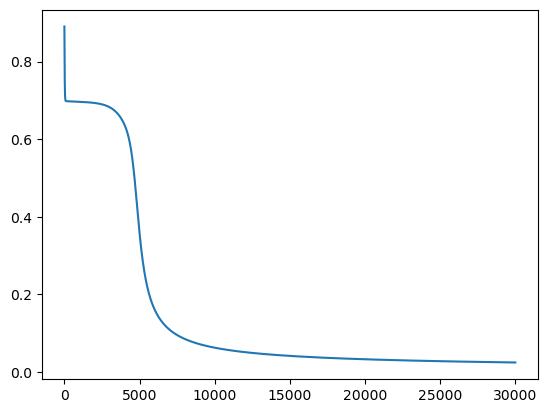

tensor([0., 1., 1., 0.]) tensor([0.0224, 0.9768, 0.9768, 0.0000])


In [472]:
x1 = torch.tensor([0., 0., 1., 1.])
x2 = torch.tensor([0., 1., 0., 1.])
bias = torch.ones_like(x1)
x = torch.stack([x1, x2, bias]).permute(1, 0)
#print("x coming", x)
print(x.shape)
y = torch.tensor([0., 1., 1., 0.])

lr = 0.1
iterations = 30000
model = NeuralNetwork(num_inputs=3, num_neurons=2, num_outputs=1)

errors = list()
for ep in range(iterations):
  error = 0
  for i in range(x.shape[0]):
    # print(x[i], y[i], y_pred)
    y_pred = model(x[i])
    # print(f" y pred: {y_pred}, {y[i]}")
    error += bce(y[i], y_pred)
    #print("y_i elem", y[i])
    model.backward_pass(x[i], torch.tensor(y[i]), lr)
  errors.append(error.item()/x.shape[0])
  if ep % 1000 ==0:
    print(f"Epoch: {ep} | Error: {error.item()/x.shape[0]}")

#print("ERRORS", errors)
plt.plot(list(range(iterations)), errors)
plt.show()

y_pred = torch.zeros_like(y)
for i in range(x.shape[1]):
  y_pred[i] = model(x[i])
print(y, y_pred)

In [505]:
# Best parameters for the job are,
hidden_layer = [[-0.5, 1, 1], [-1.5, 1, 1]]
output_layer = [1,1, -0.5]
for name, param in model.named_parameters():
    print(name, param, "\n")
    print("normalised_"+name, param / param[0][torch.argmax(param)], "\n")
    print("#"*100)


hidden_layer.0.weight Parameter containing:
tensor([[-5.1028, -5.1007,  7.6179]]) 

normalised_hidden_layer.0.weight tensor([[-0.6699, -0.6696,  1.0000]]) 

####################################################################################################
hidden_layer.1.weight Parameter containing:
tensor([[-5.6240, -5.6196,  2.2420]]) 

normalised_hidden_layer.1.weight tensor([[-2.5085, -2.5065,  1.0000]]) 

####################################################################################################
output_layer.0.weight Parameter containing:
tensor([[ 8.8631, -9.3837, -4.1528]]) 

normalised_output_layer.0.weight tensor([[ 1.0000, -1.0587, -0.4685]]) 

####################################################################################################


---------
## Showing model predictions for XOR problem

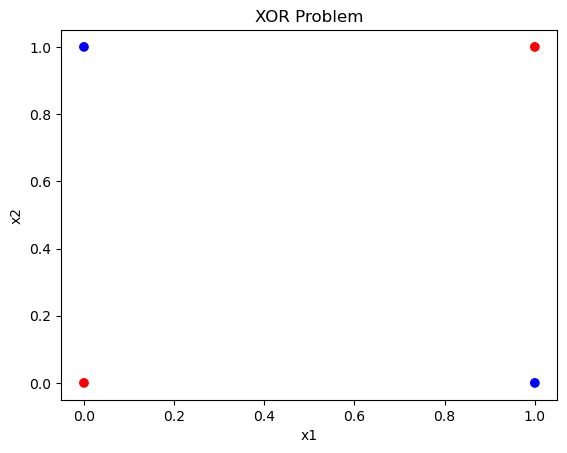

In [491]:
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
y = [0, 1, 1, 0]

c_map = ['r', 'b', 'b', 'r']
plt.scatter(x1, x2, c=c_map)
plt.title("XOR Problem")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

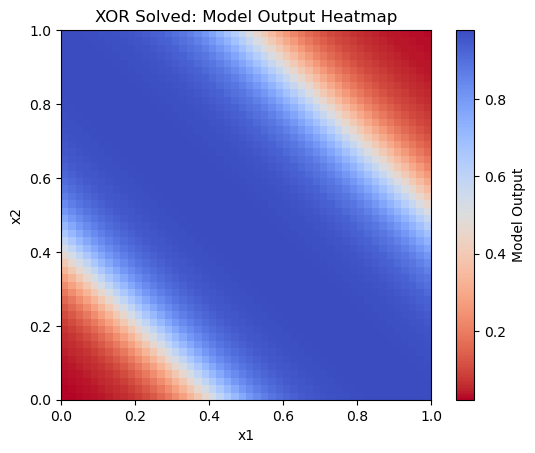

In [495]:
### Showing model predictions
x1 = torch.linspace(0, 1, 50)
x2 = torch.linspace(0, 1, 50)
inputs = torch.stack([torch.cat((xi.view(1, 1), xj.view(1, 1), torch.tensor(1.0).view(1, 1)), dim=1) for xi in x1 for xj in x2])

# Reshape the inputs to match the model input shape
inputs = inputs.view(-1, 3)
y = []
# Evaluate the model on the grid
for input in inputs:
    y.append(model(input))

# Reshape the output to match the original grid shape
outputs = torch.cat(y)

outputs = outputs.view(len(x2), len(x1))

# Create a 2D color plot
plt.imshow(outputs.detach().numpy(), cmap='coolwarm_r', extent=[0, 1, 0, 1], origin='lower')
plt.colorbar(label='Model Output')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR Solved: Model Output Heatmap')
plt.show()

# 2. Iris Dataset
We will now use pytorch built-in methods to create an MLP classifier for the iris dataset.

In [2]:
!pip install torch

In [8]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Split the data to train and test sets (make sure the same random seed is used as previously) and normalize using the method from week 4. We will use all attributes in this lab. [2 marks]

In [9]:
### your code here
from sklearn import model_selection
import torch.nn.functional as F


def norm_set(x: torch.Tensor, mu: torch.Tensor, sigma: torch.Tensor) -> torch.tensor:
    # code obtained from lab 3
    return (x - mu) / sigma

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    iris.data,
    iris.target,
    test_size=0.2,
    random_state=42
)

x_train = torch.from_numpy(X_train).float()
x_test = torch.from_numpy(X_test).float()

# Normalising x values:
x_mean = x_train.mean(dim=0)
x_std = x_train.std(dim=0)
x_train = norm_set(x_train, x_mean, x_std)
x_test = norm_set(x_test, x_mean, x_std)


# One hot encoding.
y_train = torch.from_numpy(y_train).int()
y_test = torch.from_numpy(y_test).int()


y_train = F.one_hot(y_train.reshape(-1).long(), num_classes=3).float()
y_test = F.one_hot(y_test.reshape(-1).long(), num_classes=3).float()




# Obtained usable tensors from the dataset using sklearn helpful functions.

# Add 1 for the bias at the end.
x_train = torch.cat([x_train, torch.ones(x_train.shape[0], 1)], dim=1)
x_test = torch.cat([x_test, torch.ones(x_test.shape[0], 1)], dim=1)

print(
    "x_train", x_train.shape, "\n",
    "x_test", x_test.shape, "\n",
    "y_train", y_train.shape, "\n",
    "y_test", y_test.shape, "\n"
)


x_train torch.Size([120, 5]) 
 x_test torch.Size([30, 5]) 
 y_train torch.Size([120, 3]) 
 y_test torch.Size([30, 3]) 



In [ ]:
### your code here
# def bce(y_true: torch.Tensor, y_pred: torch.Tensor) -> torch.Tensor:
#   """ Binary Cross Entropy Loss """
#   ### your code here
#   m = y_true.shape[0]
#   loss = []
#   for i in range(m):
#     loss_val = (-y_true[i]*torch.log( y_pred[i] ) - ((1-y_true[i]) * torch.log(1-y_pred[i])))
#     loss.append(loss_val)
#     # print("loss val shape", loss_val)
#   loss = torch.tensor(loss)

#   return torch.mean(loss)  # which is the sum and then average of this.



# def train(model, x, y, lr=0.1, iterations=100):
    
#     errors = list()
#     for ep in range(iterations):
#       error = 0
#       for i in range(x.shape[0]):
#         # print(x[i], y[i], y_pred)
#         y_pred = model(x[i])
#         #print(f" y pred: {y_pred}, {y[i]}")
#         error += bce(y[i], y_pred)
#         #print(error)
#         #print("y_i elem", y[i])
#         model.backward_pass(x[i], torch.tensor(y[i]), lr)
#       errors.append(error.item()/x.shape[0])
#       if ep % 10 ==0:
#         print(f"Epoch: {ep} | Error: {error.item()/x.shape[0]}")
    
#     #print("ERRORS", errors)
#     plt.plot(list(range(iterations)), errors)
#     plt.show()
    
    

# model = NeuralNetwork(5, 1, 3)
# alpha = 0.01 # select an appropriate lr
# train(model, x_train, y_train, alpha)

The question made me think we use the NueralNetwork class that we just made, however as the loss and backward pass function we created does not account for Softmax output we need in this type of classification problem, there is no way the model is able to learn and update the weights, so we have been given the easy task of using inbuild methods to create a model.
I didn't see the comment below, "using pytorch built in methods".

---------
*Binary Classification:*
- Activation Function:
 **Sigmoid (or softmax with two classes, but sigmoid is more common for binary problems).**
- Loss Function:
**Binary Cross Entropy (BCE).**

----------
*Multi-Class Classification:*
- Activation Function: 
**Softmax.**
- Loss Function:
**Categorical Cross Entropy (Softmax Cross Entropy).**


--------





Using pytorch built in methods (and using the training loop from week 4 as guideline for the train loop), build an MLP with one hidden layer. Train the network multiple times for the following number of hidden neurons `{1, 2, 4, 8, 16, 32}`.

<u><font color="maroon"> **Q3.** Explain the performance of the different networks on the training and test sets. How does it compare to the logistic regression example? Make sure that the data you are refering to is clearly presented and appropriately labeled in the report. [8 marks]</font></u>

In [10]:
print(torch.max(torch.tensor([1,2,3])))

tensor(3)


Training model with HL: 1 and LR: 0.01 and Epochs: 500
Epoch [1/500], Loss: 1.1077, Accuracy: 0.34
Epoch [101/500], Loss: 0.6590, Accuracy: 0.96
Epoch [201/500], Loss: 0.6248, Accuracy: 0.97
Epoch [301/500], Loss: 0.6133, Accuracy: 0.97
Epoch [401/500], Loss: 0.6075, Accuracy: 0.97


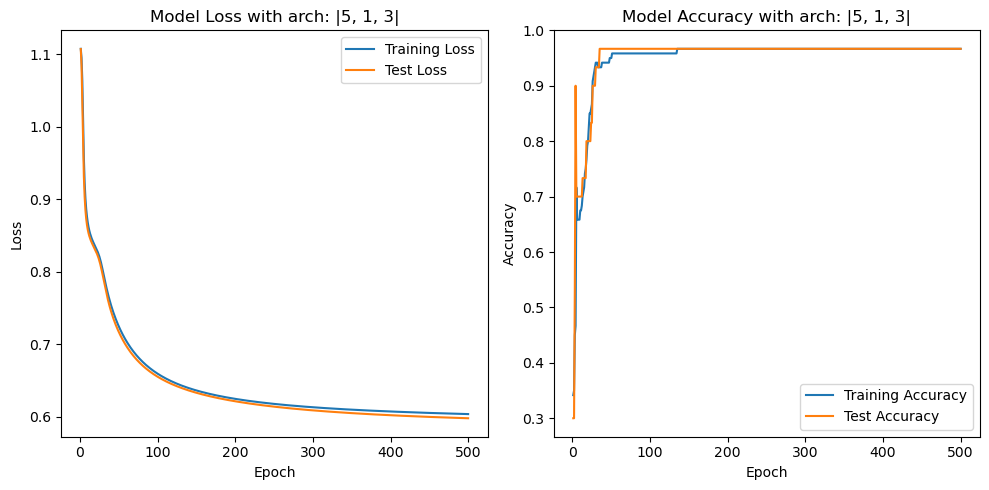

Training model with HL: 2 and LR: 0.01 and Epochs: 500
Epoch [1/500], Loss: 1.0967, Accuracy: 0.28
Epoch [101/500], Loss: 0.5850, Accuracy: 0.97
Epoch [201/500], Loss: 0.5788, Accuracy: 0.98
Epoch [301/500], Loss: 0.5761, Accuracy: 0.98
Epoch [401/500], Loss: 0.5744, Accuracy: 0.98


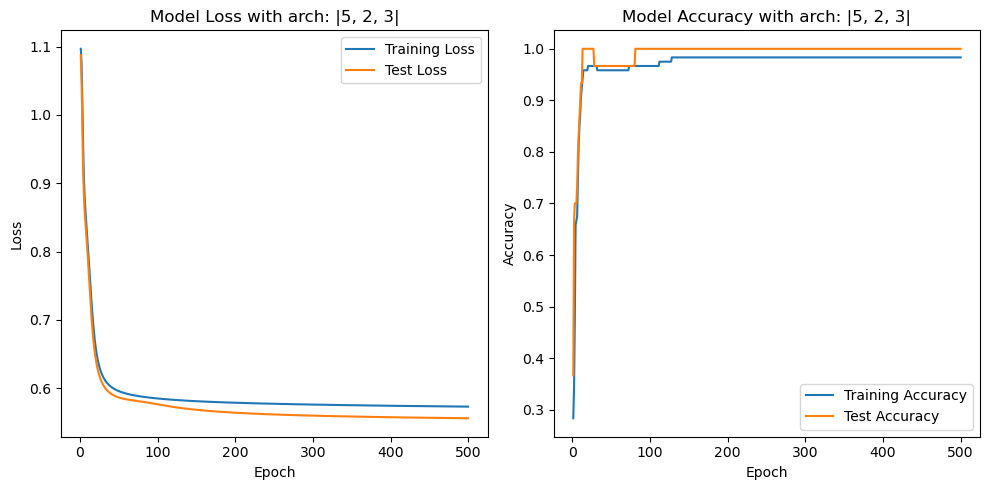

Training model with HL: 4 and LR: 0.01 and Epochs: 500
Epoch [1/500], Loss: 1.0869, Accuracy: 0.34
Epoch [101/500], Loss: 0.5839, Accuracy: 0.97
Epoch [201/500], Loss: 0.5785, Accuracy: 0.98
Epoch [301/500], Loss: 0.5763, Accuracy: 0.98
Epoch [401/500], Loss: 0.5748, Accuracy: 0.98


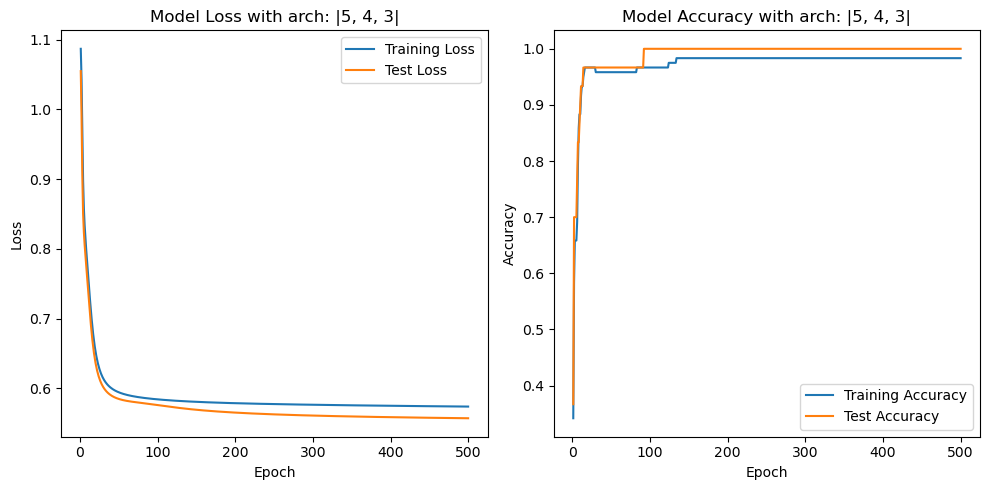

Training model with HL: 8 and LR: 0.01 and Epochs: 500
Epoch [1/500], Loss: 1.0909, Accuracy: 0.30
Epoch [101/500], Loss: 0.5832, Accuracy: 0.97
Epoch [201/500], Loss: 0.5767, Accuracy: 0.98
Epoch [301/500], Loss: 0.5720, Accuracy: 0.98
Epoch [401/500], Loss: 0.5682, Accuracy: 0.99


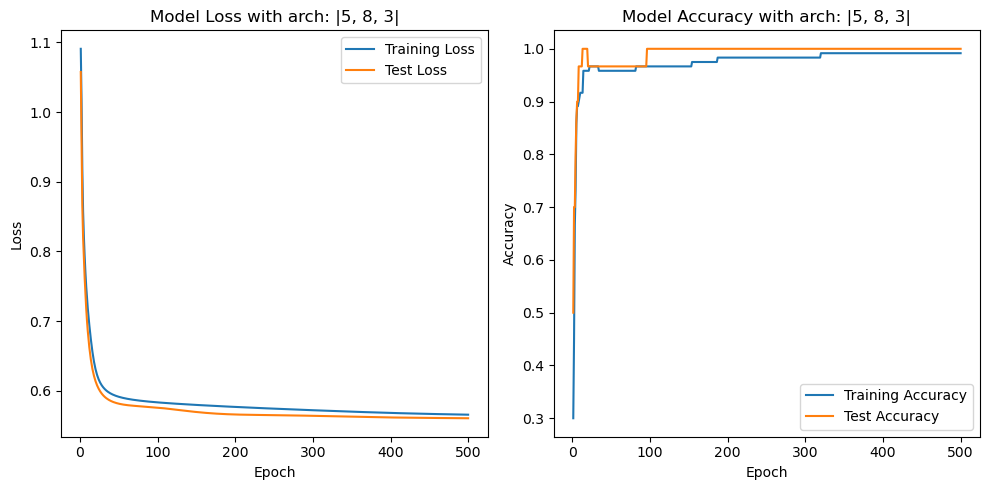

Training model with HL: 16 and LR: 0.01 and Epochs: 500
Epoch [1/500], Loss: 1.0660, Accuracy: 0.41
Epoch [101/500], Loss: 0.5833, Accuracy: 0.97
Epoch [201/500], Loss: 0.5780, Accuracy: 0.97
Epoch [301/500], Loss: 0.5737, Accuracy: 0.98
Epoch [401/500], Loss: 0.5688, Accuracy: 0.99


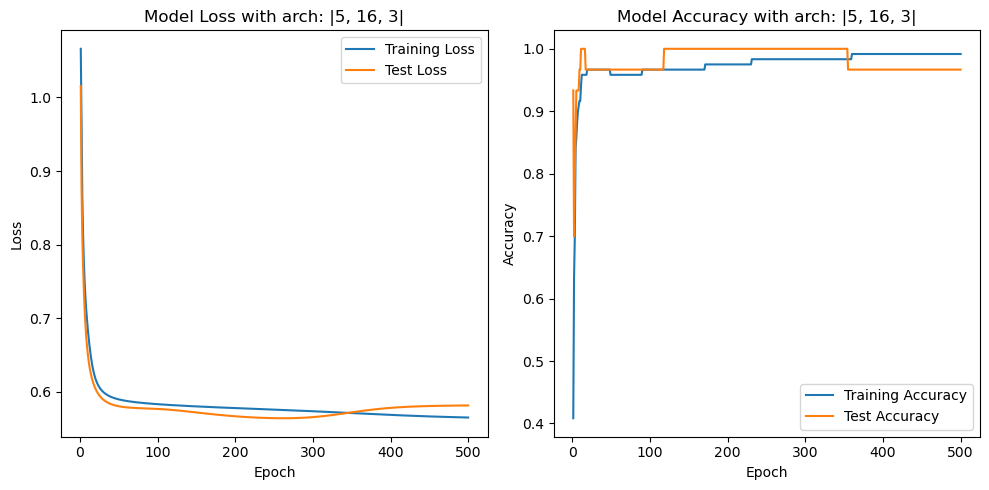

Training model with HL: 32 and LR: 0.01 and Epochs: 500
Epoch [1/500], Loss: 1.0448, Accuracy: 0.50
Epoch [101/500], Loss: 0.5835, Accuracy: 0.97
Epoch [201/500], Loss: 0.5787, Accuracy: 0.97
Epoch [301/500], Loss: 0.5750, Accuracy: 0.98
Epoch [401/500], Loss: 0.5707, Accuracy: 0.98


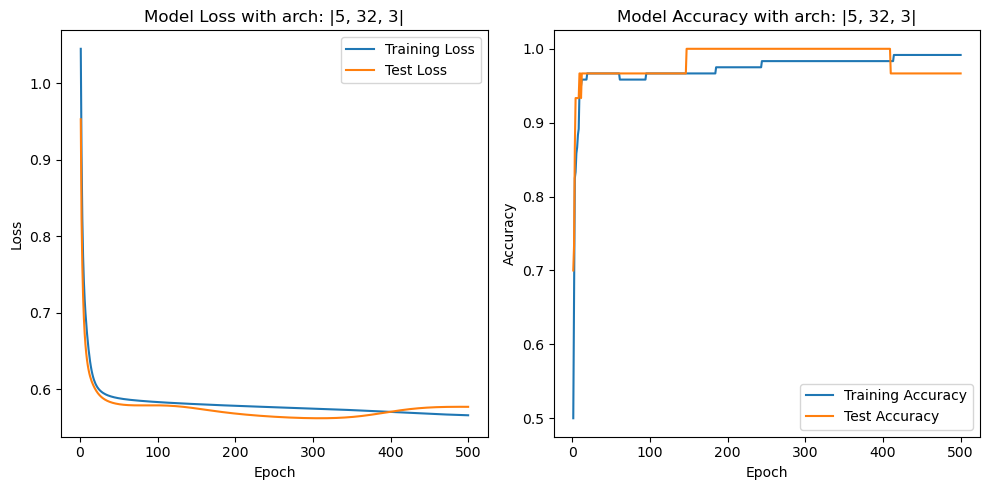

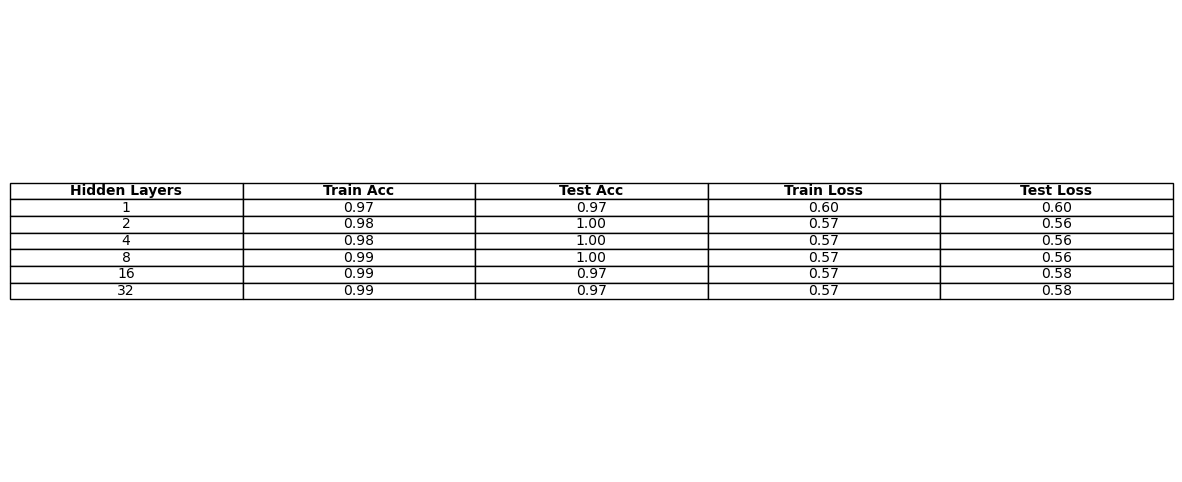

In [19]:
# Model definition.

class MLP(torch.nn.Module):
    def __init__(self, n_in, hidden_layer, n_out):
        super(MLP, self).__init__()
        self.hidden_layer = torch.nn.Linear(n_in, hidden_layer)
        self.activation = torch.nn.ReLU()
        self.sig_act = torch.nn.Sigmoid()
        # Sigmoid is good for this model, because we only have one hidden layer so don't suffer
        # from vanishing gradients, and values will be within 0 and 1, so we dont need to adjust our gradients by a lot.
        
        self.output_layer = torch.nn.Linear(hidden_layer, n_out)
        self.softmax = torch.nn.Softmax()

    def forward(self, x):
        """ Forward method for MLP model."""
        x = self.hidden_layer(x)
        # x = self.activation(x)
        x = self.sig_act(x)
        y = self.output_layer(x)
        return self.softmax(y)


# I am seeing 2 different types of optimisers that can update weights.
# - SGD with momentum  [Update lr for all weights using the addition of momentum to remove from local minimums if momentum allows it]
# - ADAM optimiser [Update learning rate based on different parameters]



def train_mlp(number_of_hidden, lr=0.01, epochs=500):
    mlp = MLP(5,number_of_hidden,3)
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(mlp.parameters(), lr=lr, momentum=0.9)
    print(f"Training model with HL: {number_of_hidden} and LR: {lr} and Epochs: {epochs}")
    
    losses = [] 
    accuracies = [] 

    valid_losses = []  # List to store validation losses
    valid_accuracies = []
    
    for epoch in range(epochs):
        epoch_loss = 0.0
        correct_predictions = 0
        total_samples = 0
        for x, y in zip(x_train, y_train):
            optimizer.zero_grad()
            y_pred = mlp(x)
            #print("y_pred,", y_pred, torch.round(y_pred, decimals=2))
            loss = loss_fn(y_pred, y)
            # print("loss calc", loss, y_pred, y)
            loss.backward()
            optimizer.step()
    
            _, predicted = torch.max(y_pred, 0)
            
            correct_predictions += (predicted == torch.argmax(y, 0)).sum().item()
            total_samples += 1
    
            epoch_loss += loss.item()
    
        acc = correct_predictions / total_samples
        accuracies.append(acc)
        losses.append(epoch_loss / total_samples)

        # calculate loss and accuracy on test set now.
        # x_test, y_test
        
        # Validation
        valid_loss = 0.0
        correct_valid_predictions = 0
        total_valid_samples = 0
        for x_valid, y_valid in zip(x_test, y_test):
            y_valid_pred = mlp(x_valid)
            valid_loss += loss_fn(y_valid_pred, torch.argmax(y_valid, dim=0)).item()
            _, predicted_valid = torch.max(y_valid_pred, 0)
            correct_valid_predictions += (predicted_valid == torch.argmax(y_valid, 0)).sum().item()
            total_valid_samples += 1

        valid_acc = correct_valid_predictions / total_valid_samples
        valid_accuracies.append(valid_acc)
        valid_losses.append(valid_loss / total_valid_samples)
        
    
        if epoch % 100 == 0:
            print_loss = epoch_loss / total_samples
            # print_loss = loss
            #print("loss calc", loss, y_pred, y)
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {print_loss:.4f}, Accuracy: {acc:.2f}')

    plt.figure(figsize=(10, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), losses, label=f'Training Loss')
    plt.plot(range(1, epochs + 1), valid_losses, label=f"Test Loss")
    plt.title(f'Model Loss with arch: |5, {number_of_hidden}, 3|')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), accuracies, label=f'Training Accuracy')
    plt.plot(range(1, epochs + 1), valid_accuracies, label=f"Test Accuracy")
    plt.title(f'Model Accuracy with arch: |5, {number_of_hidden}, 3|')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    return accuracies[-1], losses[-1], valid_accuracies[-1], valid_losses[-1]


table_data = []
table_headers = ["Hidden Layers", "Train Acc", "Test Acc", "Train Loss", "Test Loss"]
table_data.append(table_headers)
for hidden in [1, 2, 4, 8, 16, 32]:
    train_acc, train_loss, test_acc, test_loss = train_mlp(hidden)
    table_data.append([hidden, f'{train_acc:.2f}', f'{test_acc:.2f}', f'{train_loss:.2f}', f'{test_loss:.2f}'])
    

# Create the table
fig, ax = plt.subplots(figsize=(15, 6))
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colLabels=None)

# Add column headers
for i, col in enumerate(table_data[0]):
    table[0, i].set_text_props(weight='bold')

# Hide axes
ax.axis('off')

plt.show()


# Comparison of model in Lab 4 and 6.

